## Music Trends During Election Cycles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df1 = pd.read_csv('../data/top10s.csv', index_col=0)
df2 = pd.read_csv('../data/spotify_dataset.csv', index_col=0)
df3 = pd.read_csv('../data/universal_top_spotify_songs.csv', index_col=0)

In [5]:
print("DF1 Head:")
df1.head()

DF1 Head:


,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [6]:
print("DF2 Head:")
df2.head()

DF2 Head:


,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,,
1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [7]:
print("DF3 Head:")
df3.head()

DF3 Head:


,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
spotify_id,,,,,,,,,,,,,,,,,,,,,
7tI8dRuH2Yc6RuoTjxo4dU,Who,Jimin,1,0,0,NaN,2024-08-06,93,False,170887,...,0,-3.743,0,0.0320,0.00289,0.000000,0.1930,0.838,116.034,4
6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,2,0,0,NaN,2024-08-06,99,False,210373,...,2,-10.171,1,0.0358,0.20000,0.060800,0.1170,0.438,104.978,4
2qSkIjg1o9h3YT9RAgYN75,Espresso,Sabrina Carpenter,3,0,0,NaN,2024-08-06,98,True,175459,...,0,-5.478,1,0.0285,0.10700,0.000065,0.1850,0.690,103.969,4
5N3hjp1WNayUPZrA8kJmJP,Please Please Please,Sabrina Carpenter,4,0,0,NaN,2024-08-06,97,True,186365,...,9,-6.073,1,0.0540,0.27400,0.000000,0.1040,0.579,107.071,4
0WbMK4wrZ1wFSty9F7FCgu,"Good Luck, Babe!",Chappell Roan,5,0,1,NaN,2024-08-06,96,False,218423,...,11,-5.960,0,0.0356,0.05020,0.000000,0.0881,0.785,116.712,4


In [8]:
# Convert the release date to datetime in df2
df2['Release Date'] = pd.to_datetime(df2['Release Date'], errors='coerce')

# Convert snapshot_date to datetime in df3
df3['snapshot_date'] = pd.to_datetime(df3['snapshot_date'], errors='coerce')

In [9]:
# Check for missing values
print(df1.isnull().sum())
print(df2.isnull().sum())
print(df3.isnull().sum())

title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64
Highest Charting Position     0
Number of Times Charted       0
Week of Highest Charting      0
Song Name                     0
Streams                       0
Artist                        0
Artist Followers              0
Song ID                       0
Genre                         0
Release Date                 28
Weeks Charted                 0
Popularity                    0
Danceability                  0
Energy                        0
Loudness                      0
Speechiness                   0
Acousticness                  0
Liveness                      0
Tempo                         0
Duration (ms)                 0
Valence                       0
Chord                         0
dtype: int64
name                     27
artists                  27
dail

In [10]:
# Drop rows with missing release dates in df2
df2.dropna(subset=['Release Date'], inplace=True)

# Drop rows with missing snapshot dates in df3
df3.dropna(subset=['snapshot_date'], inplace=True)

In [11]:
# Fill or drop missing values as appropriate
df1.fillna(0, inplace=True)
df2.fillna(0, inplace=True)
df3.fillna(0, inplace=True)

In [12]:
# Ensure numeric columns are in the correct format
df1['year'] = pd.to_numeric(df1['year'], errors='coerce')
df2['Danceability'] = pd.to_numeric(df2['Danceability'], errors='coerce')
df2['Energy'] = pd.to_numeric(df2['Energy'], errors='coerce')
df2['Loudness'] = pd.to_numeric(df2['Loudness'], errors='coerce')
df3['duration_ms'] = pd.to_numeric(df3['duration_ms'], errors='coerce')
df3['popularity'] = pd.to_numeric(df3['popularity'], errors='coerce')
df3['loudness'] = pd.to_numeric(df3['loudness'], errors='coerce')

In [13]:
# Filter data for the required years
df1_filtered = df1[df1['year'].isin([2015, 2016, 2019])]
df2_filtered = df2[df2['Release Date'].dt.year == 2020]
df3_filtered = df3[df3['snapshot_date'].dt.year == 2023]

In [ ]:
years = [2015, 2016, 2019, 2020, 2023]
df1_filtered = df1[df1['year'].isin(years)]
df2_filtered = df2[df2['Release Date'].dt.year.isin(years)]
df3_filtered = df3[df3['snapshot_date'].dt.year.isin(years)]

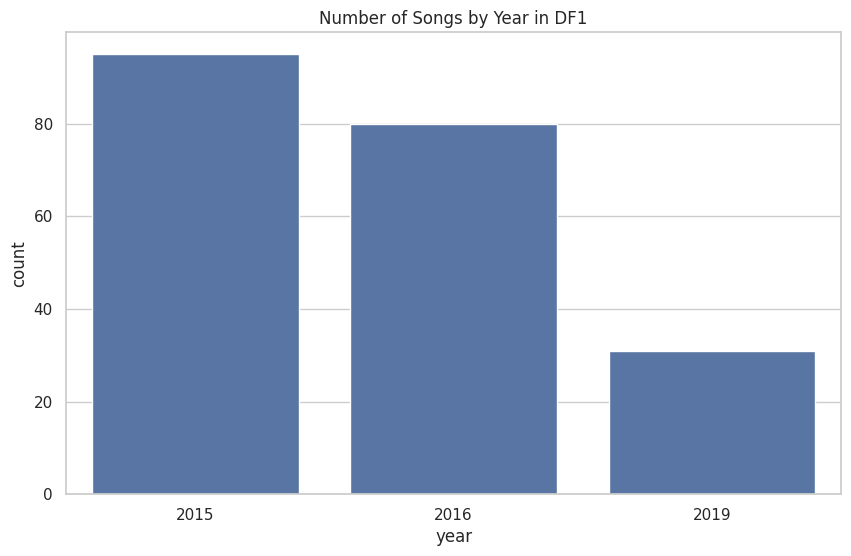

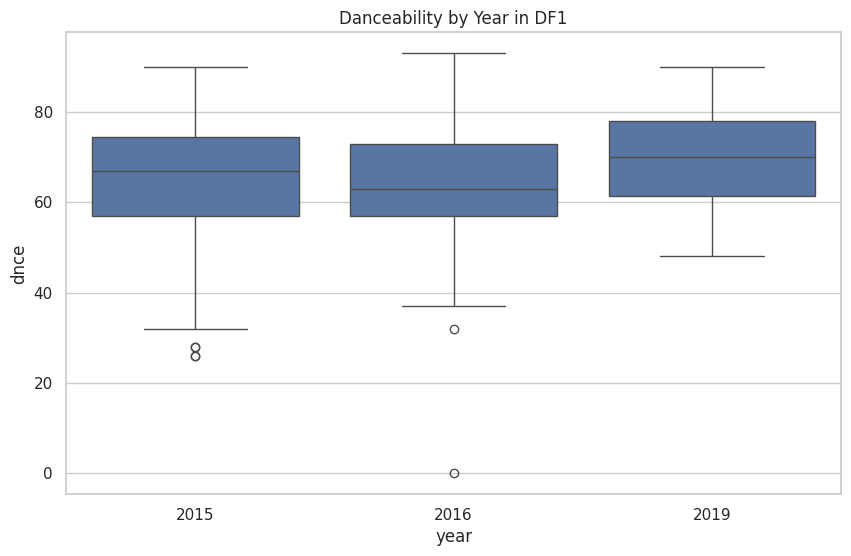

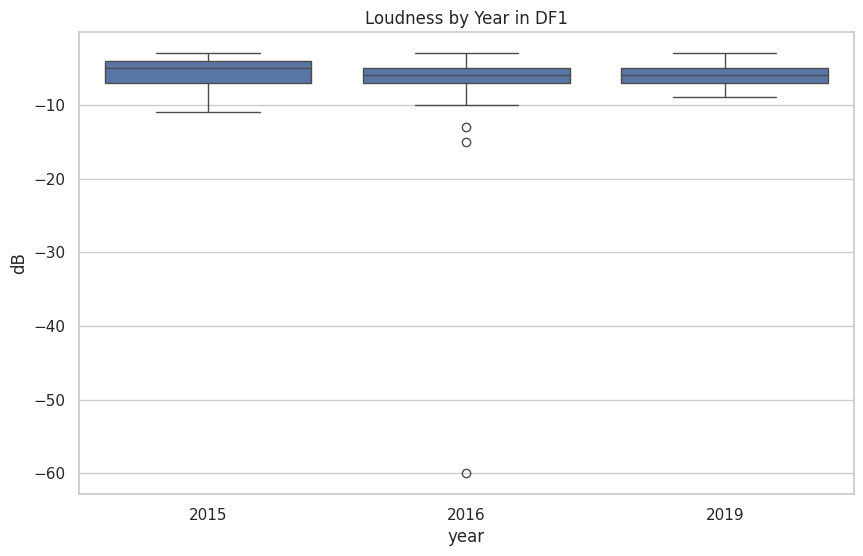

In [14]:
# EDA for df1
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df1_filtered)
plt.title('Number of Songs by Year in DF1')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='dnce', data=df1_filtered)
plt.title('Danceability by Year in DF1')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='dB', data=df1_filtered)
plt.title('Loudness by Year in DF1')
plt.show()

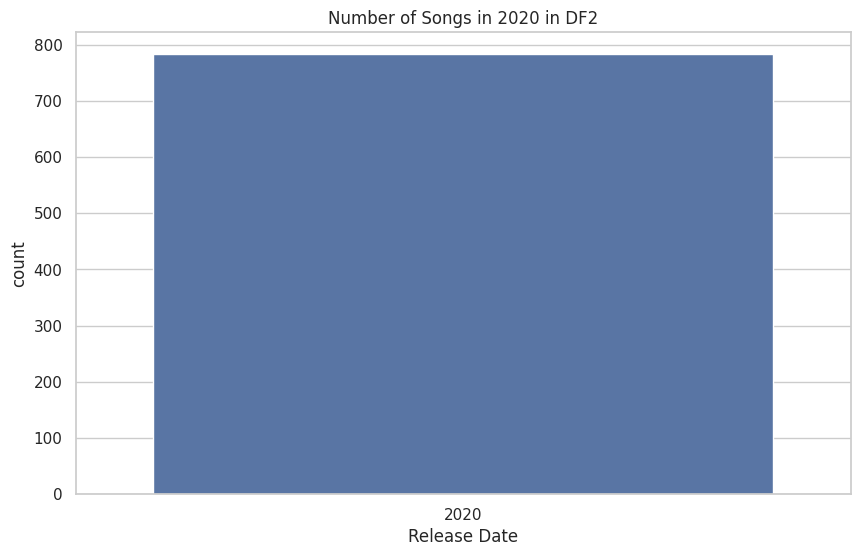

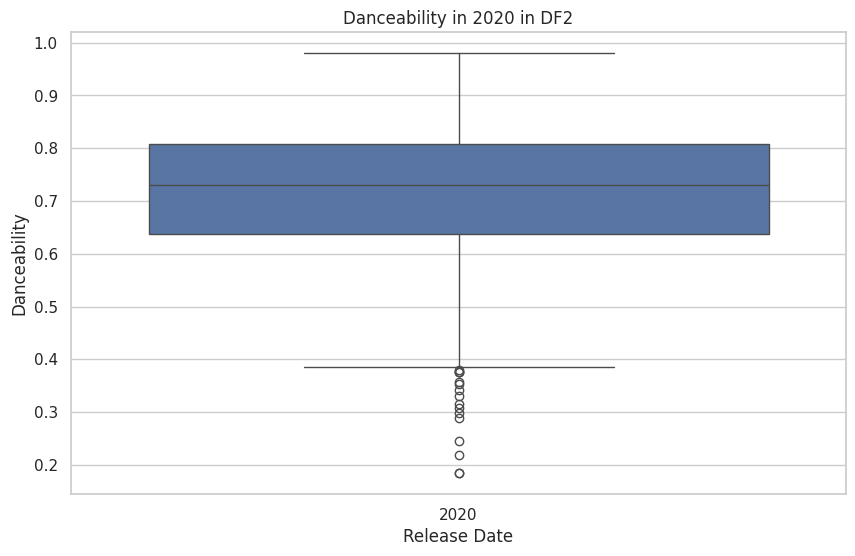

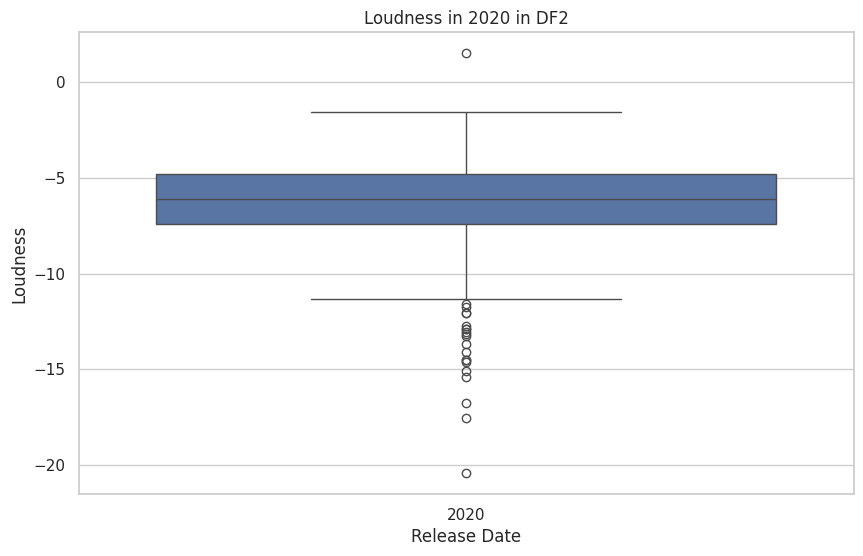

In [15]:
# EDA for df2
plt.figure(figsize=(10, 6))
sns.countplot(x=df2_filtered['Release Date'].dt.year)
plt.title('Number of Songs in 2020 in DF2')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df2_filtered['Release Date'].dt.year, y='Danceability', data=df2_filtered)
plt.title('Danceability in 2020 in DF2')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df2_filtered['Release Date'].dt.year, y='Loudness', data=df2_filtered)
plt.title('Loudness in 2020 in DF2')
plt.show()

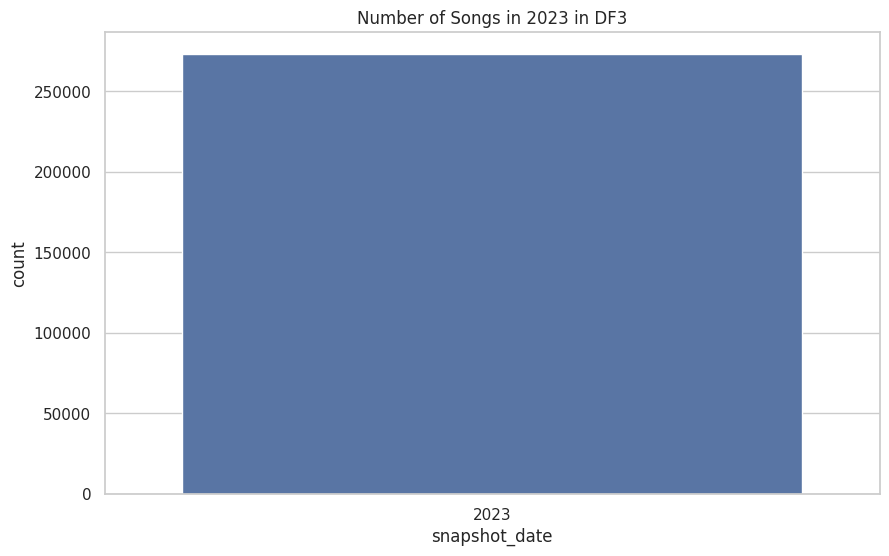

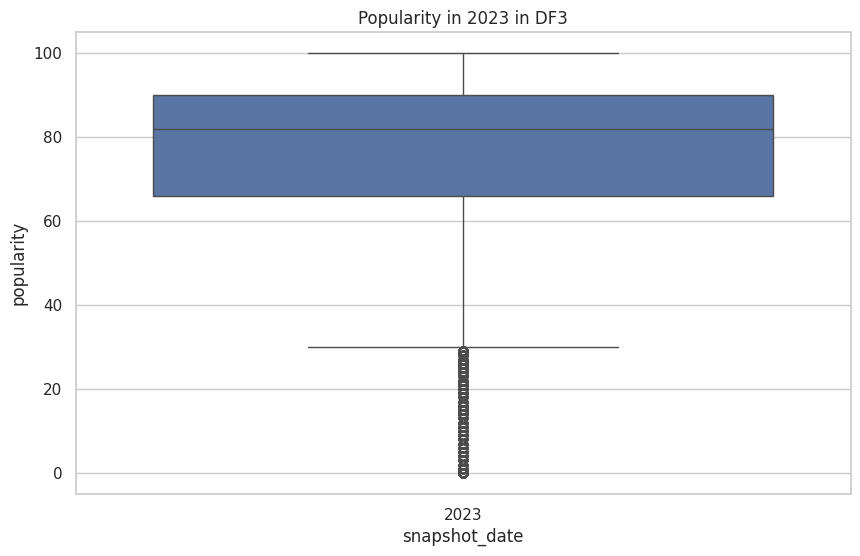

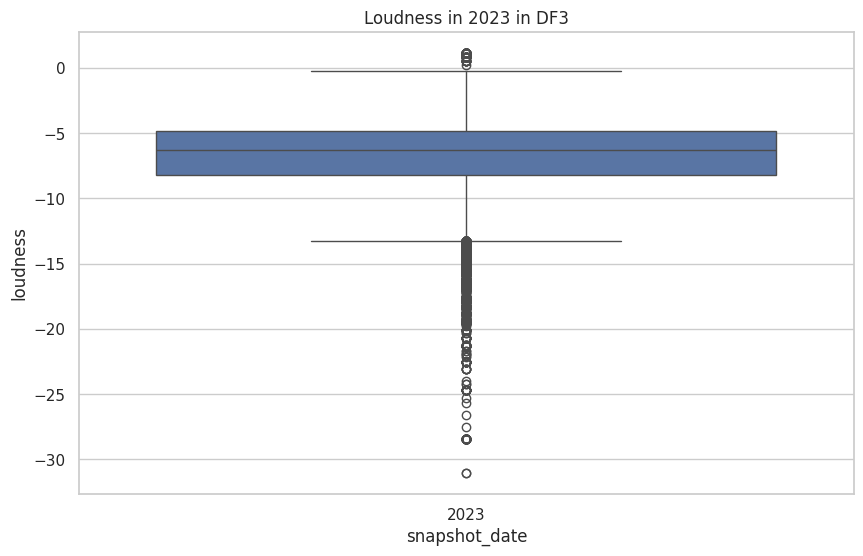

In [16]:
# EDA for df3
plt.figure(figsize=(10, 6))
sns.countplot(x=df3_filtered['snapshot_date'].dt.year)
plt.title('Number of Songs in 2023 in DF3')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df3_filtered['snapshot_date'].dt.year, y='popularity', data=df3_filtered)
plt.title('Popularity in 2023 in DF3')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df3_filtered['snapshot_date'].dt.year, y='loudness', data=df3_filtered)
plt.title('Loudness in 2023 in DF3')
plt.show()

In [17]:
from scipy.stats import ttest_ind

In [18]:
# Define election and non-election years
election_years = [2016, 2020]
non_election_years = [2015, 2019, 2023]

In [19]:
# Compare danceability in election vs non-election years for df1 and df2
dance_election_df1 = df1_filtered[df1_filtered['year'].isin([2016])]['dnce']
dance_non_election_df1 = df1_filtered[df1_filtered['year'].isin([2015, 2019])]['dnce']
dance_election_df2 = df2_filtered['Danceability']

In [20]:
# Combine data for danceability
dance_election_combined = pd.concat([dance_election_df1, dance_election_df2])
dance_non_election_combined = dance_non_election_df1

In [21]:
t_stat, p_val = ttest_ind(dance_election_combined, dance_non_election_combined)
print(f'Danceability - Election vs Non-Election Years: t-stat = {t_stat}, p-val = {p_val}')

Danceability - Election vs Non-Election Years: t-stat = -33.815618397372155, p-val = 4.262746315108004e-167


In [22]:
# Compare loudness in election vs non-election years for df1, df2, and df3
loud_election_df1 = df1_filtered[df1_filtered['year'].isin([2016])]['dB']
loud_non_election_df1 = df1_filtered[df1_filtered['year'].isin([2015, 2019])]['dB']
loud_election_df2 = df2_filtered['Loudness']
loud_non_election_df3 = df3_filtered['loudness']

In [23]:
# Combine data for loudness
loud_election_combined = pd.concat([loud_election_df1, loud_election_df2])
loud_non_election_combined = pd.concat([loud_non_election_df1, loud_non_election_df3])

In [24]:
t_stat, p_val = ttest_ind(loud_election_combined, loud_non_election_combined)
print(f'Loudness - Election vs Non-Election Years: t-stat = {t_stat}, p-val = {p_val}')

Loudness - Election vs Non-Election Years: t-stat = 3.9758514811433634, p-val = 7.014583702494149e-05
